---------
## Chapter 5 - Mean-Variance Portfolio Theory
-----

In [3]:
using Plots
using Ipopt
using JuMP
using Printf
using LinearAlgebra

#### 1 
Historically, the empirical distributions of stock prices on the NYSE have been skewed right. Why?


--------------
#### 2 
Given the following relationship between $x$ and $y$,
$$
y=a+b x \quad b<0,
$$
prove that $x$ and $y$ are perfectly negatively correlated.


$$ \begin{align}
    corr(x,y) & = \frac{cov(x,y)}{\sigma_x \cdot \sigma_y} \\
    & = \frac{cov(x,a+bx)}{b \cdot \sigma_x \cdot \sigma_x} \\
    & = \frac{-b \cdot \sigma_x^2}{b \cdot \sigma_x^2} \\
    & = -1
\end{align} $$

------------
#### 3 
Given the following hypothetical end-of-period prices for shares of the Drill-On Corporation,

$\begin{array}{lrrrrr}\text { Probability } & .15 & .10 & .30 & .20 & .25 \\ \text { End-of-period price per share } & 35.00 & 42.00 & 50.00 & 55.00 & 60.00\end{array}$

and assuming a current price of $\$ 50$ per share:

(a) Calculate the rate of return for each probability. What is the expected return? The variance of end-of-period returns? The range? The semi-interquartile range?


In [54]:
Price = 50
EOP_PPS = [35 42 50 55 60]
Prob = [.15; .1; .3; .2; .25]

Rate_Ret = EOP_PPS./Price.-1

1×5 Matrix{Float64}:
 -0.3  -0.16  0.0  0.1  0.2

In [55]:
Mean = Prob'*Rate_Ret'

1×1 adjoint(::Vector{Float64}) with eltype Float64:
 0.008999999999999994

In [56]:
Var = Prob'*Rate_Ret'.^2

1×1 adjoint(::Vector{Float64}) with eltype Float64:
 0.02806

In [57]:
range = maximum(Rate_Ret)-minimum(Rate_Ret)

0.5

In [58]:
semi_iqr = (Rate_Ret[round.(cumsum(Prob),digits=2).==0.75] - Rate_Ret[cumsum(Prob).==0.25])/2

1-element Vector{Float64}:
 0.13000000000000006

(b) Suppose forecasting is refined such that probabilities of end-of-period prices can be broken down further, resulting in the following distribution:

$\begin{array}{lllllllllll}\text { Probability } & .01 & .05 & .07 & .02 & .10 & .30 & .20 & .15 & .05 & .05 \\ 
\text {End-of-period price per share } & 0 & 35.00 & 38.57 & 40.00 & 42.00 & 50.00 & 55.00 & 57.00 & 60.00 & 69.00\end{array}$

Calculate and explain the change in the expected return, the range of returns, and the semiinterquartile range of returns. Calculate the semivariance of end-of-period returns. Why might some investors be concerned with semivariance as a measure of risk?

--------------

#### 5 

Using the definition of portfolio variance, prove that a perfectly hedged stock portfolio that is 100 shares long and 100 shares short is perfectly risk free.


-----
#### 6 
Given Professor Singer's variance-covariance matrix:
$$
\left[\begin{array}{rrr}
24 & -10 & 9 \\
-10 & 75 & 3 \\
9 & 3 & 12
\end{array}\right]
$$
(a) Calculate the variance of an equally weighted portfolio.
(b) Calculate the covariance of a portfolio that has $10 \%$ in asset $1,80 \%$ in asset 2 , and $10 \%$ in asset 3 with a second portfolio that has $125 \%$ in asset $1,-10 \%$ in asset 2 , and $-15 \%$ in asset 3.


--------
#### 7 

Given two random variables $x$ and $y$ :

| Probability of State of Nature | State of Nature | Variable $\boldsymbol{x}$ | Variable $\boldsymbol{y}$ |
| --- | --- | --- | --- |
$.2$ | I | 18 | 0 |
$.2$ | II | 5 | $-3$ |
$.2$ | III | 12 | 15 |
$.2$ | IV | 4 | 12 |
$.2$ | V | 6 | 1 |

(a) Calculate the mean and variance of each of these variables, and the covariance between them.



In [239]:
Prob = [.2 .2 .2 .2 .2]

x = [18 5 12 4 6]
y = [0 -3 15 12 1]

mean_x = x*Prob'
mean_y = y*Prob'

var_x = (x .-mean_x).^2*Prob'
var_y = (y .-mean_y).^2*Prob'

covar_xy = Prob*diag((x .-mean_x)'*(y .-mean_y))

@printf("Mean of x: %.2f \nMean of y: %.2f", mean_x[1], mean_y[1])
@printf("\nVariance of x: %.2f \nVariance of y: %.2f \nCovariance of x & y: %.2f", var_x[1], var_y[1], covar_xy[1])

1-element Vector{Float64}:
 -1.1999999999999997

(b) Suppose $x$ and $y$ represent the returns from two assets. Calculate the mean and variance for the following portfolios:
$$
\begin{array}{lrrrrrrr}
\% \text { in } x & 125 & 100 & 75 & 50 & 25 & 0 & -25 \\
\% \text { in } y & -25 & 0 & 25 & 50 & 75 & 100 & 125
\end{array}
$$



In [288]:
h = [1.25 1 .75 .5 .25 0 -.25]

mean_h = h'*mean_x+(1 .-h)'*mean_y

var_h = h'.^2*var_x + (1 .-h)'.^2*var_y .+ 2*(h.*(1 .-h)*covar_xy[1])'

7×1 Matrix{Float64}:
 47.675
 28.0
 18.475
 19.1
 29.875000000000004
 50.800000000000004
 81.875

(c) Find the portfolio that has the minimum variance.



In [163]:
opt = Model(Ipopt.Optimizer)
@variable(opt,h)
@NLobjective(opt, Min, h^2*var_x[1] + (1-h)^2*var_y[1] + 2*h*(1-h)*covar_xy[1])
set_silent(opt)
optimize!(opt)

opt_h=value.(h)
17.5/objective_value(opt)

1.5332932094121459

(d) Let portfolio $A$ have $75 \%$ in $x$ and portfolio $B$ have $25 \%$ in $x$. Calculate the covariance between the two portfolios.

In [160]:
h_A = 0.75
h_B = 0.25

var_AB = [h_A 1-h_A]*[var_x covar_xy[1]; covar_xy[1] var_y]*[h_B; 1-h_B]

1-element Vector{Float64}:
 9.075000000000001

(e) Calculate the covariance between the minimum variance portfolio and portfolio $A$, and the covariance between the minimum variance portfolio and portfolio $B$.

In [174]:
MVP = opt_h*x+(1-opt_h)*y

mean_MVP = Prob*MVP'
covar_AM = [opt_h 1-opt_h]*[var_x covar_xy[1]; covar_xy[1] var_y]*[h_A; 1-h_A]
covar_BM = [opt_h 1-opt_h]*[var_x covar_xy[1]; covar_xy[1] var_y]*[h_B; 1-h_B]

@printf("Covariance of A with MVP: %.2f \nCovariance of B with MVP: %.2f", covar_AM[1], covar_BM[1])

Covariance of A with MVP: 11.41 
Covariance of B with MVP: 11.41

11.41334214002642

(f) What is the covariance between the minimum variance portfolio and any other portfolio along the efficient set?

17.5

(g) What is the relationship between the covariance of the minimum variance portfolio with other efficient portfolios, and the variance of the minimum variance portfolio?

As the variance of the MVP decreases, so does the covariance of other efficient portfolios and the MVP.

$$cov(P, MVP) = \frac{1}{\textbf{1}^T\:(\Sigma^{-1})\:\textbf{1}} \cdot var(MVP)$$

--------------
#### 8
 Prove that for any securities $\tilde{X}$ and $\tilde{Y}$ :
(a) $E(a \tilde{X}+b \widetilde{Y})=a E(\tilde{X})+b E(\widetilde{Y})$.

(b) $\operatorname{VAR}(a \widetilde{X}+b \widetilde{Y})=a^2 \operatorname{VAR}(\widetilde{X})+b^2 \operatorname{VAR}(\tilde{Y})+2 a b \operatorname{COV}(\tilde{X}, \widetilde{Y})$

(c) $\operatorname{COV}[(a \widetilde{X}+b \widetilde{Z}), \widetilde{Y}]=a \operatorname{COV}(\widetilde{X}, \widetilde{Y})+b \operatorname{COV}(\widetilde{Z}, \widetilde{Y})$.

(d) $E\left(\widetilde{X}^2\right)=(E(\widetilde{X}))^2+\operatorname{VAR}(\widetilde{X})$.

(e) If $r_{x y}=1$, then $\sigma(X+Y)=\sigma_x+\sigma_y$. If $r_{x y}=-1$, then $\sigma(\tilde{X}+\tilde{Y})=\sigma_x-\sigma_y$.


-----------
#### 9
 Let $R_1$ and $R_2$ be the returns for two securities with $E\left(R_1\right)=.03$ and $E\left(R_2\right)=.08, \operatorname{VAR}\left(R_1\right)=$ $.02, \operatorname{VAR}\left(R_2\right)=.05$, and $\operatorname{COV}\left(R_1, R_2\right)=-.01$.

(a) Plot the set of feasible mean-variance combinations of return, assuming that the two securities above are the only investment vehicles available.

(b) If we want to minimize risk, how much of our portfolio will we invest in security 1 ?

(c) Find the mean and standard deviation of a portfolio that is $50 \%$ in security 1.


-----------
#### 10 
Two securities have the following joint distribution of returns, $r_1$ and $r_2$ :
$$
\begin{aligned}
& P\left\{r_1=-1.0 \text { and } r_2=.15\right\}=.1, \\
& P\left\{r_1=.5 \text { and } r_2=.15\right\}=.8, \\
& P\left\{r_1=.5 \text { and } r_2=1.65\right\}=.1 .
\end{aligned}
$$
(a) Compute the means, variances, and covariance of returns for the two securities.

(b) Plot the feasible mean-standard deviation $[E(R), \sigma]$ combinations, assuming that the two securities are the only investment vehicles available.

(c) Which portfolios belong to the mean-variance efficient set?

(d) Show that security 2 is mean-variance dominated by security 1, yet enters all efficient portfolios but one. How do you explain this?

(e) Suppose the possibility of lending, but not borrowing, at $5 \%$ (without risk) is added to the previous opportunities. Draw the new set of $[E(R), \sigma]$ combinations. Which portfolios are now efficient?


In [246]:
Prob = [.1 .8 .1]
r1 = [-1 .5 .5]
r2 = [.15 .15 1.65]

mean_r1 = Prob*r1'
mean_r2 = Prob*r2'

var_r1 = Prob*(r1.-mean_r1)'.^2
var_r2 = Prob*(r2.-mean_r2)'.^2
covar_r1r2 = Prob*diag((r1 .-mean_r1)'*(r2 .-mean_r2))

@printf("Mean of r1: %.2f \nMean of r2: %.2f", mean_r1[1], mean_r2[1])
@printf("\nVariance of r1: %.4f \nVariance of r2: %.4f \nCovariance of r1 & r2: %.4f", var_r1[1], var_r2[1], covar_r1r2[1])

Mean of r1: 0.35 
Mean of r2: 0.30
Variance of r1: 0.2025 
Variance of r2: 0.2025 
Covariance of r1 & r2: 0.0225

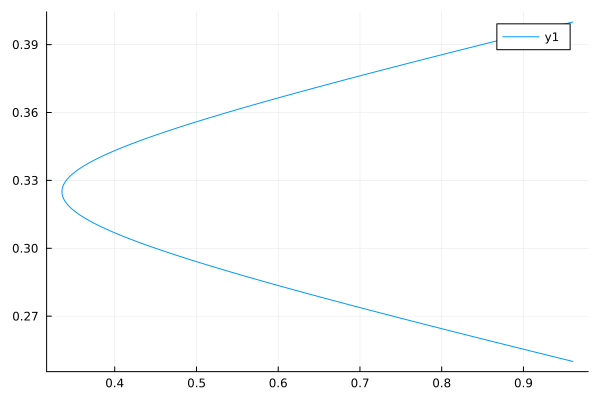

In [316]:
h=zeros(301)
h[1] = -1
for i in 2:length(h)
    h[i] = h[i-1]+3/(length(h)-1)
end

mean_h = h.*mean_r1+(1 .-h).*mean_r2
var_h = h'.^2 .*var_r1 + (1 .-h)'.^2 .*var_r2 .+ 2*(h.*(1 .-h)*covar_r1r2[1])'
sd_h = sqrt.(var_h)

plot(sd_h', mean_h)

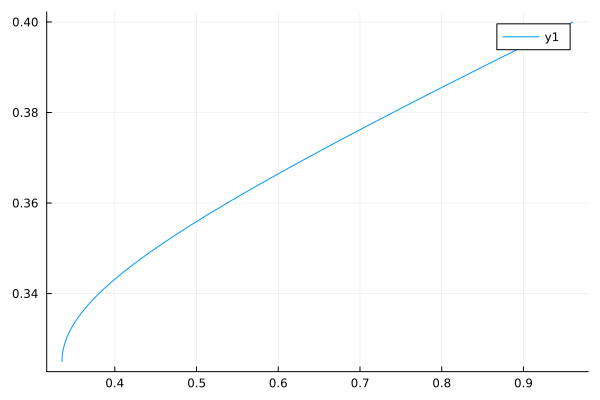

In [369]:
min_sd = minimum(sd_h)
index = findall(x -> x .== min_sd, sd_h)

MVP_sd = getindex(sd_h, index)
MVP_ret = getindex(mean_h', index)

index = findall(x -> x .>= MVP_ret[1], mean_h)

eff_front = [getindex(sd_h', index) getindex(mean_h, index)]

plot(eff_front[:,1], eff_front[:,2])

$E\left[r_1\right] \geq E\left[ r_2 \right]$

$var\left( r_1 \right) \leq var\left( r_2 \right)$

So Security 1 mean-variance dominates Security 2. 

Despite this, it enters all but one of the efficient portfolios due to the diversification effect.

----------
#### 11
 Suppose a risk-averse investor can choose a portfolio from among $N$ assets with independently distributed returns, all of which have identical means $\left[E\left(R_i\right)=E\left(R_j\right)\right]$ and identical variances $\left(\sigma_i^2=\sigma_j^2\right)$. What will be the composition of his optimal portfolio?

 Holding of $\frac{1}{N}$ in each asset

---------- 
##### 12
 Given decreasing marginal utility, it is possible to prove that in a mean-variance framework no individual will hold $100 \%$ of his or her wealth in the risk-free asset. Why? (Hint: The answer requires an understanding of the shape of investors' indifference curves as well as the Capital Market Line.)

------------
#### 13

Given that assets X and Y are perfectly correlated such that Y = 6 + .2X and the probability distribution for X is:

| Probability | X (%) |
| --- | --- |
| .1 | 30% |
| .2 | 20% |
| .4 | 15% |
| .2 | 10% |
| .1 | -50% |

What is the percentage of your wealth to put into asset X to achieve zero variance? Graph the
opportunity set and the zero variance point.

In [426]:
Prob = [.1 .2 .4 .2 .1]
X = [.3 .2 .15 .1 -.5]
Y = .06 .+ .2 .*X

mean_X = Prob*X'
mean_Y = Prob*Y'

sd_X = sqrt.(Prob*diag((X.-mean_X)'*(X.-mean_X)))
sd_Y = sqrt.(Prob*diag((Y.-mean_Y)'*(Y.-mean_Y)))
cov_XY = sd_X.*sd_Y

h=zeros(301)
h[1] = -1
for i in 2:length(h)
    h[i] = h[i-1]+3/(length(h)-1)
end

index = findall(x -> x==0, sd_h)
h'[index]

1-element Vector{Float64}:
 -0.24999999999999933

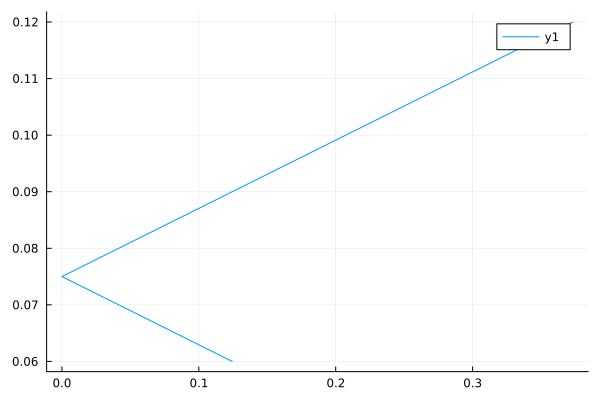

In [427]:
mean_h = h.*mean_X .+(1 .-h).*mean_Y
sd_h = sqrt.(h'.^2 .*var_X + (1 .-h)'.^2 .*var_Y .+ 2*(h.*(1 .-h)*cov_XY[1])')

plot(sd_h', mean_h)

#### 14

A market value balance sheet for the Carr Commercial Bank is given below in millions of dollars:

| Assets |  | Liabilities |  | 
| --- | --- | --- | --- |
| Short-Term | 100 | Short-Term | 50 |
| US Govt. Bonds | 200 | Deposits | 850 |
| Loans | 700 | Equity | 100 |

The standard deviations and correlations between returns on asset and liability categories (excepting equity) are as follows:
$$
\begin{aligned}
& \sigma(S T A)=.02, \quad r_{S T A, U S}=0, \quad r_{S T A, L}=0, \quad r_{S T A, S T L}=0, \quad r_{S T A, D}=0, \\
& \sigma(U S)=.04, \quad r_{U S, L}=.8, \quad r_{U S, S T L}=0, \quad r_{U S, D}=.3, \\
& \sigma(L)=.07, \quad r_{L, S T L}=0, \quad r_{L, D} \cdot 2, \\
& \sigma(S T L)=.02, \quad r_{S T L, D}=0, \\
& \sigma(D)=.03 . \\
&
\end{aligned}
$$
(a) What is the standard deviation of the equity holder's position?

(b) Suppose the bank decides to hedge by taking a position in T-bond futures contracts. You are given the following information:
$$
\begin{gathered}
V_{T B}=\$ 90,000 \text { for a } \$ 100,000 \text { face value T-bond contract, } \\
\sigma_{T B}=.08, \quad r_{T B, S T A}=0, \quad r_{T B, L}=.5, \quad r_{T B, S T L}=0, \quad r_{T B, D}=.3 .
\end{gathered}
$$
Should the bank take a long or short position in T-bond futures? How many futures contracts should they buy/sell? How much is the standard deviation of equity reduced?

In [61]:
corr = [1 0 0 0 0; 0 1 .8 0 .3; 0 .8 1 0 .2; 0 0 0 1 0; 0 .3 .2 0 1]
sd = Diagonal([.02, .04, .07, .02, .03])

cov = sd*corr*sd

V = [1 2 7 -.5 -8.50]*100
sd_h = sqrt(V*cov*V')

1×1 Matrix{Float64}:
 55.90393546075268

In [37]:
r_TB = [0 .9 .5 0 .3]
sd_TB = 0.08

N = -V.*r_TB.*sd_vec./(.09 .*sd_TB)*ones(5)

1-element Vector{Float64}:
 -3340.2777777777783

Should take a short position in 3340 T-Bonds.

In [76]:
V_tb = N*.09
V_hedge = [V V_tb]

corr_hedge = [corr r_TB'; r_TB 1]
sd_new = [diag(sd); sd_TB]

cov_hedge = sd_new.*corr_hedge.*sd_new
sd_hedge = sqrt(V_hedge*cov_hedge*V_hedge')

1×1 Matrix{Float64}:
 50.46478041664305

Hedge reduces the standard deviation of our portfolio by 0.43